# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     741.0
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           6.24e-39
Time:                        13:04:31   Log-Likelihood:                -5.6733
No. Observations:                  50   AIC:                             19.35
Df Residuals:                      46   BIC:                             26.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9840      0.096     51.746      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49699925  4.99917227  5.4586015   5.84499024  6.13897575  6.33531041
  6.44372395  6.48732485  6.49880368  6.51506216  6.5711503   6.69450774
  6.90045558  7.18967909  7.54811515  7.9492628   8.35853723  8.73895202
  9.05719584  9.28910547  9.42363571  9.46467409  9.43040215  9.35030828
  9.26034283  9.19701161  9.19137807  9.26395965  9.42135684  9.65516873
  9.94337327 10.25394541 10.55011873 10.79642607 10.96452668 11.03786251
 11.01437868 10.90686106 10.7408356  10.5503745  10.37249824 10.24109319
 10.18134422 10.20559687 10.31132902 10.48156526 10.68766592 10.89403247
 11.06395626 11.16564965]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.1666328  11.02220059 10.75415378 10.41217348 10.06165753  9.76770882
  9.5791958   9.51678784  9.56789457  9.68974853]


## Plot comparison

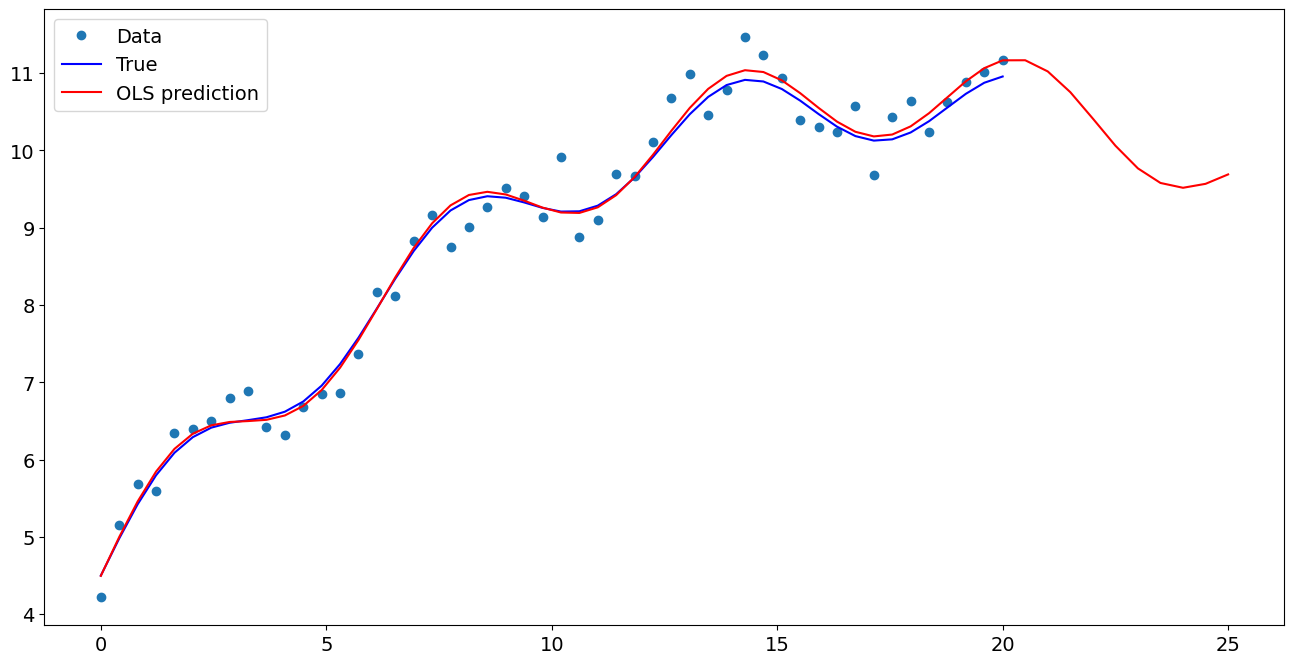

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.984018
x1                  0.502864
np.sin(x1)          0.555911
I((x1 - 5) ** 2)   -0.019481
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.166633
1    11.022201
2    10.754154
3    10.412173
4    10.061658
5     9.767709
6     9.579196
7     9.516788
8     9.567895
9     9.689749
dtype: float64